In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

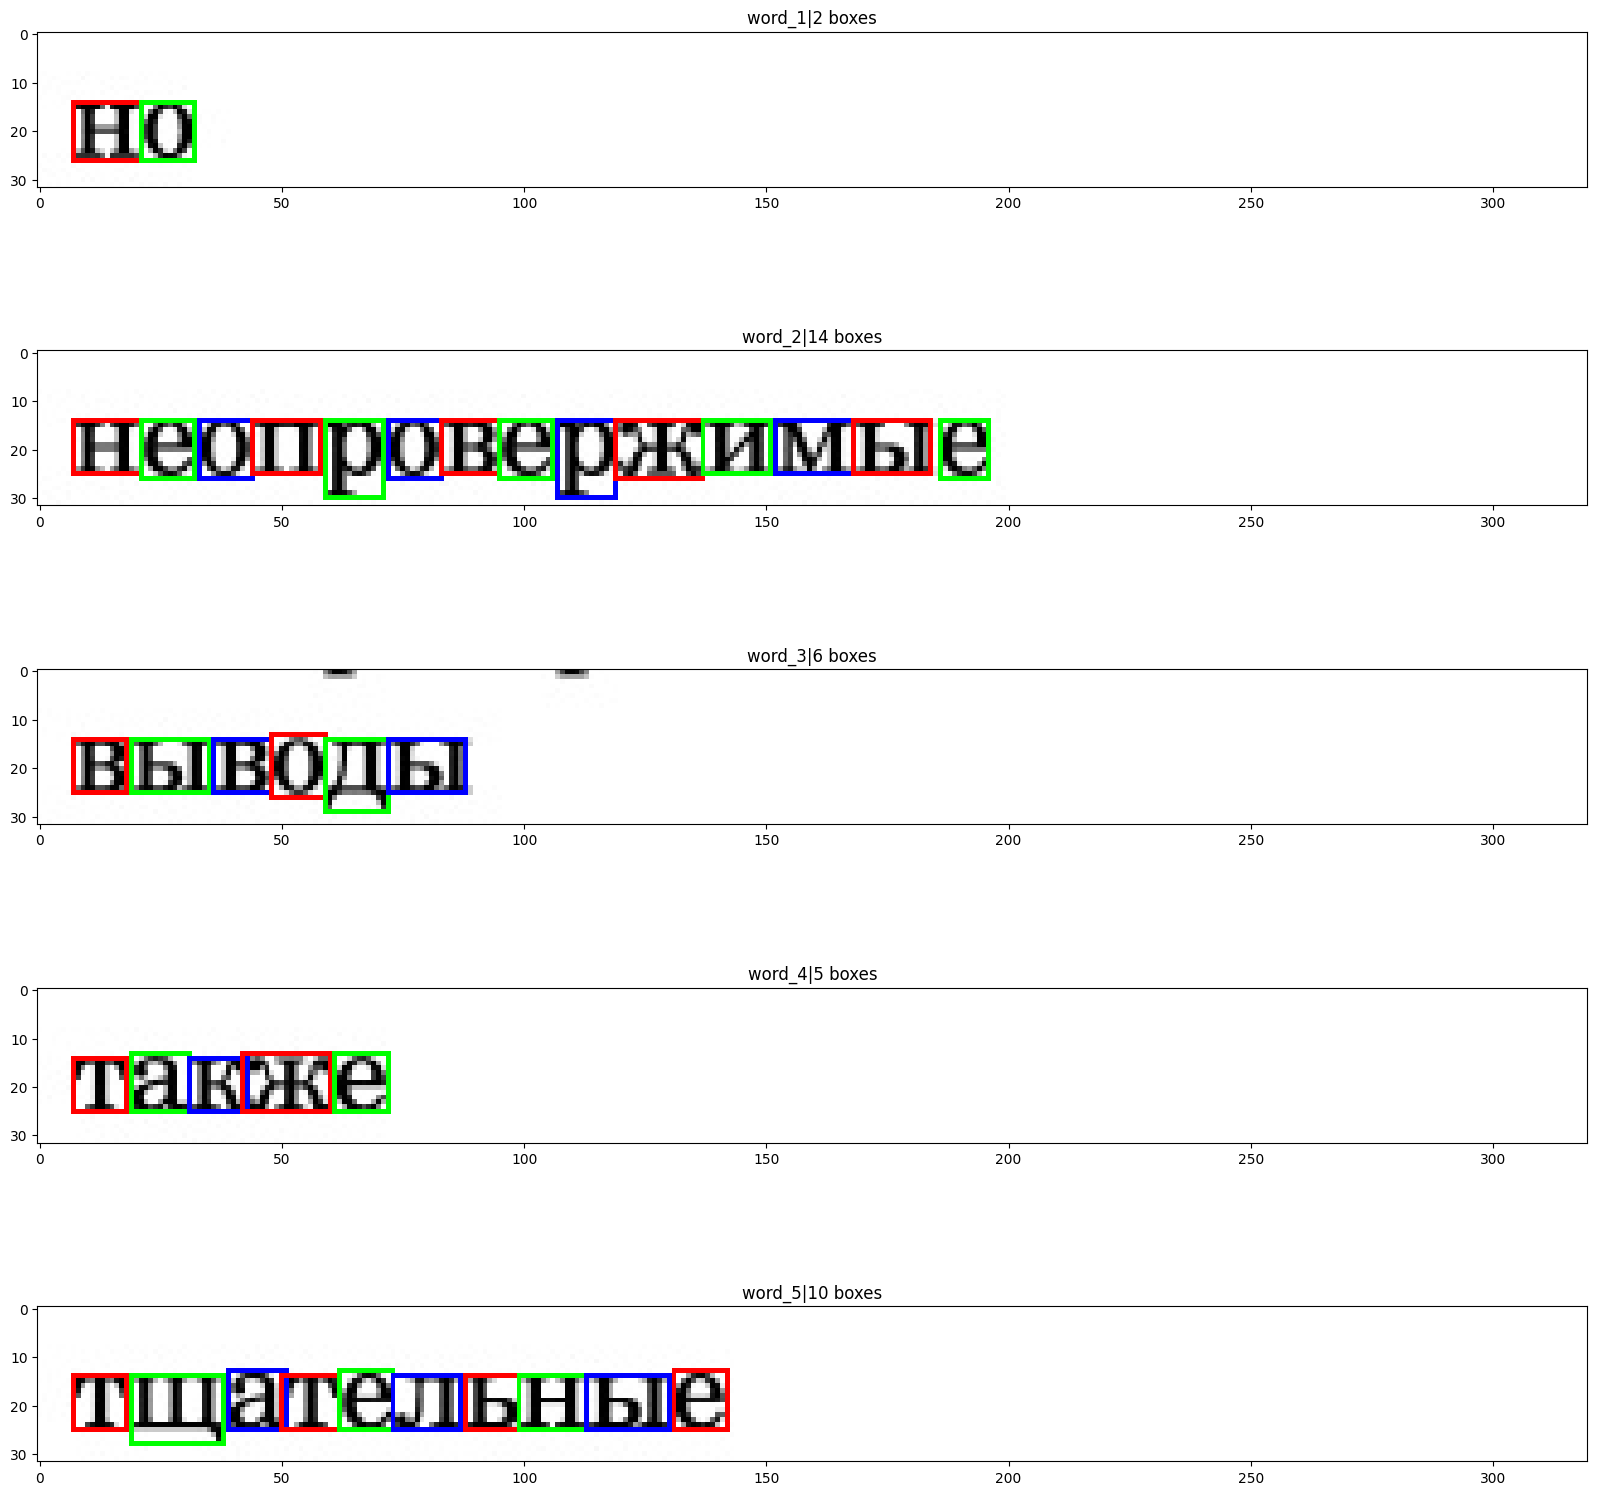

In [182]:
num_pics = 5
start_from = 1

fig, ax = plt.subplots(nrows=num_pics, ncols=1, figsize=(20,20))
for i in range(num_pics):
    filename = 'word_{i}'.format(i=i+start_from)
    img = cv2.imread(f'../data/prepared/imgs/{filename}.jpg')
    bboxes = list(pd.read_csv(f'../data/prepared/bboxes/{filename}.csv').values[:,1:])
   
    bboxes.sort(key=lambda bb: bb[0])
    bboxes = np.array(bboxes)

    for e, bb in enumerate(bboxes):
        color = np.zeros((3))
        color[e%3]+=255
        cv2.rectangle(img, bb[:2].astype(int), (bb[:2]+bb[2:]).astype(int),color, 1)
    ax[i].imshow(img)
    # ax[i].axis('off')
    ax[i].set_title(filename + f"|{bboxes.shape[0]} boxes")